In [1]:
from utils import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
forecast = pd.read_csv("data/test_forecast_long.csv")
forecast = forecast[forecast['ds'] >= '2021-01-04']
forecast["timestamp"] = forecast["ds"]

cutoff_ts = forecast['ds'].min()

forecast

ds       yhat            timestamp
72     2021-01-04 00:00:00  24.568160  2021-01-04 00:00:00
73     2021-01-04 01:00:00  23.393322  2021-01-04 01:00:00
74     2021-01-04 02:00:00  21.921172  2021-01-04 02:00:00
75     2021-01-04 03:00:00  21.076043  2021-01-04 03:00:00
76     2021-01-04 04:00:00  22.434293  2021-01-04 04:00:00
...                    ...        ...                  ...
17515  2022-12-31 19:00:00  53.420872  2022-12-31 19:00:00
17516  2022-12-31 20:00:00  50.855014  2022-12-31 20:00:00
17517  2022-12-31 21:00:00  46.182950  2022-12-31 21:00:00
17518  2022-12-31 22:00:00  41.473853  2022-12-31 22:00:00
17519  2022-12-31 23:00:00  38.098186  2022-12-31 23:00:00

[17448 rows x 3 columns]

In [3]:
# Fetch forwards data for the same date range as the forecast
forwards = filter_independent(get_forwards(
    timestamp=cutoff_ts,
    start=forecast["timestamp"].min(),
    end="2023-01-01"
))

forwards

/Users/adrianscholl/LRZ Sync+Share/Projects/price-forward-curve/utils.py:38: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  forwards['TimeStamp'] = pd.to_datetime(forwards['TimeStamp'], errors='coerce')
/Users/adrianscholl/LRZ Sync+Share/Projects/price-forward-curve/utils.py:39: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  forwards['Begin'] = pd.to_datetime(forwards['Begin'], errors='coerce')
/Users/adrianscholl/LRZ Sync+Share/Projects/price-fo

Identifier                  TimeStamp                      Begin  \
0           D  2021-01-04 00:00:00+01:00  2021-01-04 00:00:00+01:00   
1           D  2021-01-04 00:00:00+01:00  2021-01-05 00:00:00+01:00   
2           D  2021-01-04 00:00:00+01:00  2021-01-06 00:00:00+01:00   
3           D  2021-01-04 00:00:00+01:00  2021-01-07 00:00:00+01:00   
4           D  2021-01-04 00:00:00+01:00  2021-01-08 00:00:00+01:00   
5           D  2021-01-04 00:00:00+01:00  2021-01-09 00:00:00+01:00   
6           D  2021-01-04 00:00:00+01:00  2021-01-10 00:00:00+01:00   
7           W  2021-01-04 00:00:00+01:00  2021-01-11 00:00:00+01:00   
8           W  2021-01-04 00:00:00+01:00  2021-01-18 00:00:00+01:00   
9           W  2021-01-04 00:00:00+01:00  2021-01-25 00:00:00+01:00   
10          W  2021-01-04 00:00:00+01:00  2021-02-01 00:00:00+01:00   
11          M  2021-01-04 00:00:00+01:00  2021-02-01 00:00:00+01:00   
12          M  2021-01-04 00:00:00+01:00  2021-03-01 00:00:00+01:00   
13          M  2021-01-04 00:00:00+01:00  2021-04-01 00:00:00+02:00   
14          M  2021-01-04 00:00:00+01:00  2021-05-01 00:00:00+02:00   
15          M  2021-01-04 00:00:00+01:00  2021-06-01 00:00:00+02:00   
16          M  2021-01-04 00:00:00+01:00  2021-07-01 00:00:00+02:00   
17          M  2021-01-04 00:00:00+01:00  2021-08-01 00:00:00+02:00   
18          M  2021-01-04 00:00:00+01:00  2021-09-01 00:00:00+02:00   
19          M  2021-01-04 00:00:00+01:00  2021-10-01 00:00:00+02:00   
20          Q  2021-01-04 00:00:00+01:00  2021-10-01 00:00:00+02:00   
21          Q  2021-01-04 00:00:00+01:00  2022-01-01 00:00:00+01:00   
22          Q  2021-01-04 00:00:00+01:00  2022-04-01 00:00:00+02:00   
23          Q  2021-01-04 00:00:00+01:00  2022-07-01 00:00:00+02:00   
24          Q  2021-01-04 00:00:00+01:00  2022-10-01 00:00:00+02:00   

                          End   Open   High    Low  Close  Settlement  
0   2021-01-05 00:00:00+01:00    NaN    NaN    NaN    NaN       48.02  
1   2021-01-06 00:00:00+01:00  54.50  54.50  53.50  54.00       55.34  
2   2021-01-07 00:00:00+01:00  58.00  58.00  54.00  54.00       56.03  
3   2021-01-08 00:00:00+01:00  69.25  69.25  68.00  68.00       69.25  
4   2021-01-09 00:00:00+01:00  69.50  69.50  69.50  69.50       71.38  
5   2021-01-10 00:00:00+01:00    NaN    NaN    NaN    NaN       55.31  
6   2021-01-11 00:00:00+01:00    NaN    NaN    NaN    NaN       48.59  
7   2021-01-18 00:00:00+01:00  50.50  53.05  50.50  52.30       52.70  
8   2021-01-25 00:00:00+01:00  52.50  52.50  51.50  51.50       51.10  
9   2021-02-01 00:00:00+01:00  54.75  55.00  53.45  53.45       53.49  
10  2021-02-08 00:00:00+01:00    NaN    NaN    NaN    NaN       53.97  
11  2021-03-01 00:00:00+01:00  52.30  54.40  52.30  52.45       52.72  
12  2021-04-01 00:00:00+02:00  45.50  48.25  45.50  47.85       47.75  
13  2021-05-01 00:00:00+02:00  44.00  45.10  44.00  44.95       45.06  
14  2021-06-01 00:00:00+02:00    NaN    NaN    NaN    NaN       43.27  
15  2021-07-01 00:00:00+02:00    NaN    NaN    NaN    NaN       46.39  
16  2021-08-01 00:00:00+02:00    NaN    NaN    NaN    NaN       46.81  
17  2021-09-01 00:00:00+02:00    NaN    NaN    NaN    NaN       45.18  
18  2021-10-01 00:00:00+02:00    NaN    NaN    NaN    NaN       51.12  
19  2021-11-01 00:00:00+01:00    NaN    NaN    NaN    NaN       49.55  
20  2022-01-01 00:00:00+01:00  52.30  52.30  52.05  52.05       51.92  
21  2022-04-01 00:00:00+02:00  54.65  54.65  54.65  54.65       54.60  
22  2022-07-01 00:00:00+02:00    NaN    NaN    NaN    NaN       46.59  
23  2022-10-01 00:00:00+02:00    NaN    NaN    NaN    NaN       48.78  
24  2023-01-01 00:00:00+01:00    NaN    NaN    NaN    NaN       53.74

In [4]:
t, F = partition_forwards(forwards, pd.to_datetime(cutoff_ts, utc=True)-pd.Timedelta(1, 'h'))

In [5]:
# Construct matrices
H = construct_H(t)

In [6]:
s_t = np.array(forecast["yhat"])
A, b = construct_A_and_b(t, F, s_t)


0 24
24 48
48 72
72 96
96 120
120 144
144 168
168 336
336 504
504 672
672 840
672 1344
1344 2087
2087 2807
2807 3551
3551 4271
4271 5015
5015 5759
5759 6479
6479 7224
6479 8688
8688 10847
10847 13031
13031 15239
15239 17448


In [7]:
n = len(t)-1
m = len(F)

3*(n-1)+1+m

98

In [8]:
# Solve the system
x, lam = solve_linear_system(H, A, b)

# Results
print("Solution x:", x)
print("Lagrange multipliers λ:", lam)

Solution x: [-3.03242002e-06 -5.80147213e-16  5.28628067e-15  3.63451603e-01
  8.14864009e+00  1.16329866e-05 -1.40787903e-03  5.06836452e-02
 -4.47486721e-01  1.30142700e+01 -1.78424907e-05  4.25141261e-03
 -3.56785353e-01  1.25915212e+01 -1.43453825e+02  1.06335405e-05
 -3.94968440e-03  5.28933124e-01 -2.99229657e+01  6.21806939e+02
  3.49898071e-06 -1.21001342e-03  1.34420503e-01 -4.67415797e+00
  1.58355542e+01 -7.88639297e-06  4.25496595e-03 -8.49275783e-01
  7.40215450e+01 -2.34503553e+03  3.15225548e-06 -2.10329556e-03
  5.24108703e-01 -5.78233657e+01  2.40138125e+03 -2.81570056e-08
  3.39416290e-05 -1.44750692e-02  2.49801677e+00 -1.32116814e+02
  7.30890138e-09 -1.37245500e-05  9.54868501e-03 -2.88330417e+00
  3.19914146e+02 -2.47409762e-09  5.99797602e-06 -5.36154464e-03
  2.12653299e+00 -3.11325337e+02  1.19931652e-09 -3.87616119e-06
  4.59158566e-03 -2.33246939e+00  4.37787063e+02 -8.04560884e-11
  4.23874767e-07 -8.26459639e-04  7.01635981e-01 -1.99375065e+02
  1.63298911e

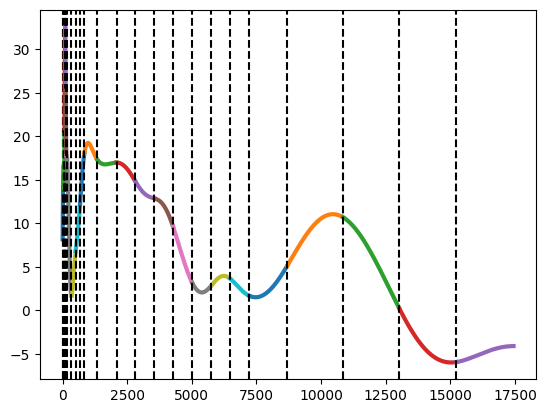

In [9]:

for k in range(len(t)-1):
    plt.plot(range(t[k],t[k+1],1),[epsilon(x,t,i) for i in range(t[k],t[k+1],1)],lw=3)
    #plot dotted vertical lines at t[k]
    plt.axvline(x=t[k], color='k', linestyle='--')

In [15]:
epsilon_values = [epsilon(x, t, i) for i, _ in enumerate(forecast["yhat"])]
initial_yhat = forecast["yhat"]
forecast["corrected"] = forecast["yhat"] + epsilon_values

fig = plot_forecast_forwards("2021-01-04", forecast, forwards)

# Add intial as a dashed red line
fig.add_trace(go.Scatter(
    x=forecast["timestamp"],
    y=forecast["corrected"],
    mode='lines',
    name='s(t)',
    line=dict(color='red', dash='dash')
))

# Add the correction area as a transparent red fill
fig.add_trace(go.Scatter(
    x=pd.concat([forecast["timestamp"], forecast["timestamp"][::-1]]),
    y=pd.concat([initial_yhat, forecast["corrected"][::-1]]),
    fill='toself',
    fillcolor='rgba(255, 0, 0, 0.2)',  # Transparent red
    line=dict(color='rgba(255, 0, 0, 0)'),
    name='arbitrage correction \u03b5(t)'
))


/Users/adrianscholl/LRZ Sync+Share/Projects/price-forward-curve/utils.py:38: FutureWarning:

In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`

/Users/adrianscholl/LRZ Sync+Share/Projects/price-forward-curve/utils.py:39: FutureWarning:

In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`

/Users/adrianscholl/LRZ Sync+Share/Projects/price-forward-curve/utils.py:40: FutureWarning:

In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`.